# Explore dataset previous to models

In [1]:
import json
import os
import re

# import seaborn as sns
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [2]:
file_path = f"{ os.getcwd() }/output/"
file_folder = "04.filter_and_join/"
file_folder_postproc = "05.dataset_to_model/"
file_name = "04.preproc_dataset.csv"

In [3]:
df = pd.read_csv(file_path + file_folder + file_name, low_memory=False)

In [4]:
df.shape

(1971302, 126)

In [5]:
df.head(5)

created_at               id_str  \
0  Wed Jul 20 23:08:58 +0000 2022  1549894160467083264   
1  Wed Jul 20 23:08:58 +0000 2022  1549894160735518723   
2  Wed Jul 20 23:08:58 +0000 2022  1549894160634765315   
3  Wed Jul 20 23:08:58 +0000 2022  1549894160953532416   
4  Wed Jul 20 23:08:58 +0000 2022  1549894161037496321   

                                                text                  source  \
0  @cirogomes Esse é você?\n\nAs ideias mudaram? ...     Twitter Web App\n\n   
1  RT @sartoprefeito12: Oficializamos hoje a cand...  Twitter for iPhone\n\n   
2  #TimeLulaEmCampo\naLÔ, Pelo dia do amigo eu qu...     Twitter Web App\n\n   
3  RT @Frmarchetaria: @desmentindobozo @paoladcs ...     Twitter Web App\n\n   
4  RT @ThiagoResiste: Criminoso preso com MALAS D...  Twitter for iPhone\n\n   

  truncated is_quote_status quote_count reply_count retweet_count  \
0     False            True           0           0             0   
1     False           False           0           0             0   
2      True           False           0           0             0   
3     False           False           0           0             0   
4     False           False           0           0             0   

  favorite_count  ...                   extended_tweet.entities.urls_url  \
0            0.0  ...                                                NaN   
1            0.0  ...                                                NaN   
2            0.0  ...  ["https://t.co/M3VbT1JV5T',", "https://lula.co...   
3            0.0  ...                                                NaN   
4            0.0  ...                                                NaN   

  retweeted_status.quoted_status.extended_tweet.entities.urls_url  \
0                                                NaN                
1                                                NaN                
2                                                NaN                
3                                                NaN                
4                                                NaN                

                                            text_url  \
0  ['https://t.co/v3zvWUcjWB', 'https://t.co/exoU...   
1                                                 []   
2                        ['https://t.co/8o8rbcXgBK']   
3                                                 []   
4                                                 []   

     retweeted_status.text_url retweeted_status.extended_tweet.full_text_url  \
0                          NaN                                           NaN   
1  ['https://t.co/5Rxexgv6bV']                   ['https://t.co/bSBs4Nl1Cd']   
2                          NaN                                           NaN   
3  ['https://t.co/QMz2Vx5LTK']                                            []   
4  ['https://t.co/3PqjI3eqpq']                                            []   

        quoted_status.text_url retweeted_status.quoted_status.text_url  \
0  ['https://t.co/6NX8QjrSry']                                     NaN   
1                          NaN                                     NaN   
2                          NaN                                     NaN   
3                          NaN                                     NaN   
4                          NaN                                     NaN   

  extended_tweet.full_text_url  \
0                          NaN   
1                          NaN   
2  ['https://t.co/M3VbT1JV5T']   
3                          NaN   
4                          NaN   

  retweeted_status.quoted_status.extended_tweet.full_text_url  \
0                                                NaN            
1                                                NaN            
2                                                NaN            
3                                                NaN            
4                                                NaN            

  quoted_status.extended_tweet.full_text_url  


In [6]:
df.columns

Index(['created_at', 'id_str', 'text', 'source', 'truncated',
       'is_quote_status', 'quote_count', 'reply_count', 'retweet_count',
       'favorite_count',
       ...
       'extended_tweet.entities.urls_url',
       'retweeted_status.quoted_status.extended_tweet.entities.urls_url',
       'text_url', 'retweeted_status.text_url',
       'retweeted_status.extended_tweet.full_text_url',
       'quoted_status.text_url', 'retweeted_status.quoted_status.text_url',
       'extended_tweet.full_text_url',
       'retweeted_status.quoted_status.extended_tweet.full_text_url',
       'quoted_status.extended_tweet.full_text_url'],
      dtype='object', length=126)

In [7]:
df.dtypes.value_counts()

object     122
float64      4
dtype: int64

In [8]:
df.dtypes

created_at                                                     object
id_str                                                         object
text                                                           object
source                                                         object
truncated                                                      object
                                                                ...  
quoted_status.text_url                                         object
retweeted_status.quoted_status.text_url                        object
extended_tweet.full_text_url                                   object
retweeted_status.quoted_status.extended_tweet.full_text_url    object
quoted_status.extended_tweet.full_text_url                     object
Length: 126, dtype: object

In [9]:
# Casts

In [10]:
# I had True as value. Created at was null.
df[df["user.followers_count"] == 'True'].head(2)

created_at id_str text source truncated is_quote_status  \
520818  Twitter for Android\n\n    NaN  NaN    NaN       NaN        767233.0   

       quote_count reply_count retweet_count favorite_count  ...  \
520818       453.0       909.0       15506.0        46788.0  ...   

       extended_tweet.entities.urls_url  \
520818                              NaN   

       retweeted_status.quoted_status.extended_tweet.entities.urls_url  \
520818                                                NaN                

       text_url retweeted_status.text_url  \
520818      NaN                       NaN   

       retweeted_status.extended_tweet.full_text_url quoted_status.text_url  \
520818                                           NaN                    NaN   

       retweeted_status.quoted_status.text_url extended_tweet.full_text_url  \
520818                                     NaN                          NaN   

       retweeted_status.quoted_status.extended_tweet.full_text_url  \
520818                                                NaN            

       quoted_status.extended_tweet.full_text_url  
520818                                        NaN  

[1 rows x 126 columns]

Parse datetime

In [11]:
df.created_at = pd.to_datetime(df.created_at, errors='coerce', infer_datetime_format=True)

Filter nan in created_at

In [12]:
df = df[~df.created_at.isna()]

Parse integer nums

In [13]:
for i in ["user.followers_count",
          "user.friends_count",
          "user.listed_count",
          "user.favourites_count",
          "quote_count",
          "retweet_count",
          "reply_count",
          "retweet_count",
          "favorite_count"]:
    df[i] = pd.to_numeric(df[i])
    
        # "user.verified": min

# Col exploration

## Twitter source

In [14]:
df.source.value_counts()

Twitter for Android\n\n    1193658
Twitter for iPhone\n\n      421135
Twitter Web App\n\n         329870
Twitter for iPad\n\n         10315
TweetDeck\n\n                 3547
                            ...   
ivoox id\n\n                     1
Sea_1point0\n\n                  1
kuah_rendang bot\n\n             1
VidyaIsvaraBot\n\n               1
Copy Cat Bot\n\n                 1
Name: source, Length: 764, dtype: int64

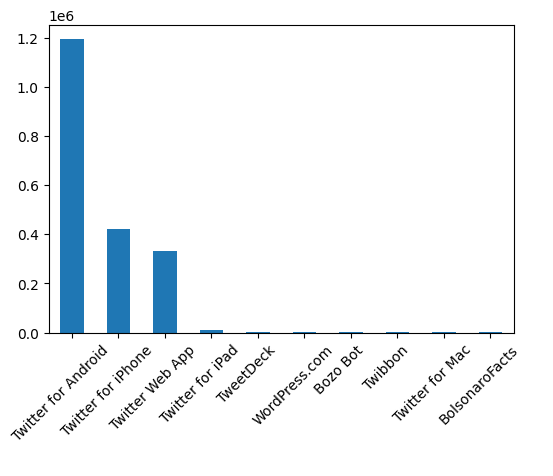

In [15]:
fig, ax = plt.subplots()
df.source.value_counts().head(10).plot.bar(
    figsize=[6, 4],
    ax=ax,
)

# ax.set_ylabel("Dates", fontsize=14, labelpad=20)
# ax.set_xlabel("Sources", fontsize=8, labelpad=20)
plt.xticks(rotation=45)
# plt.tick_params(
#     axis="x",  # changes apply to the x-axis
#     which="both",  # both major and minor ticks are affected
#     bottom=False,  # ticks along the bottom edge are off
#     top=False,  # ticks along the top edge are off
#     labelbottom=False,
# )  # labels along the bottom edge are off
plt.show()

In [16]:
df.shape[0]

1971262

In [17]:
df.source.value_counts().head(35)

Twitter for Android\n\n                1193658
Twitter for iPhone\n\n                  421135
Twitter Web App\n\n                     329870
Twitter for iPad\n\n                     10315
TweetDeck\n\n                             3547
WordPress.com\n\n                         1335
Bozo Bot\n\n                              1203
Twibbon\n\n                               1197
Twitter for Mac\n\n                       1195
BolsonaroFacts\n\n                         642
dlvr.it\n\n                                559
Ciroflix Bot\n\n                           411
IFTTT\n\n                                  400
Tweetbot for iΟS\n\n                       285
Cheap Bots, Done Quick!\n\n                273
XeuleBot V2\n\n                            270
Instagram\n\n                              248
genobolso\n\n                              188
Hootsuite Inc.\n\n                         173
Zapier.com\n\n                             153
BotLulaRT\n\n                              138
mLabs - Gestã

## Verified

In [18]:
df.shape

(1971262, 126)

In [19]:
df["user.verified"].value_counts()

False    1963460
True        7779
Name: user.verified, dtype: int64

In [20]:
df[df["user.verified"] == 'True']["user.name"]

448                   Márcio Falcão
517               Gilberto Natalini
680            Diario de Pernambuco
855             Tercio Arnaud Tomaz
1010                 Pedro Zambarda
                     ...           
1969164                Rodrigo Lago
1969766                Teddy Wilson
1969945             Samir Salim Jr.
1969968              GuiXimenes 🇧🇷🏴
1971110    Tarcísio Motta + Lula 13
Name: user.name, Length: 7779, dtype: object

In [21]:
df[df["user.verified"] == 'True']["user.name"].value_counts().shape

(2407,)

In [22]:
df[df["user.verified"] == 'False']["user.name"].value_counts().shape

(507942,)

In [23]:
df[df["user.verified"] == 'True'].groupby(by=["user.screen_name"]).agg({
        "user.followers_count": max,
        "user.friends_count": max,
        "user.listed_count": max,
        "user.favourites_count": max,
        "quote_count": max,
        "retweet_count": max,
        "reply_count": max,
        "retweet_count": max,
        "favorite_count": max,
}).sort_values(by="user.followers_count", ascending=False)

user.followers_count  user.friends_count  user.listed_count  \
user.screen_name                                                                
TheEconomist                26983059.0               146.0           122179.0   
Reuters                     25591511.0              1240.0           136201.0   
DaniloGentili               17292017.0               406.0            20059.0   
AP                          16028916.0              6807.0           105621.0   
felipeneto                  15228167.0               808.0            17273.0   
...                                ...                 ...                ...   
alvessdan                        213.0              1066.0                3.0   
jvppena                          210.0               152.0                0.0   
ondinejeanb                       93.0              1012.0                0.0   
MVerenicz                         64.0               221.0                0.0   
FilipeNBrasil                     60.0               434.0                0.0   

                  user.favourites_count  quote_count  retweet_count  \
user.screen_name                                                      
TheEconomist                      153.0          0.0            0.0   
Reuters                           755.0          0.0            0.0   
DaniloGentili                    1076.0          0.0            0.0   
AP                               3997.0          0.0            0.0   
felipeneto                       8854.0          0.0            0.0   
...                                 ...          ...            ...   
alvessdan                        1218.0          0.0            0.0   
jvppena                          6699.0          0.0            0.0   
ondinejeanb                      3958.0          0.0            0.0   
MVerenicz                         133.0          0.0            0.0   
FilipeNBrasil                     398.0          0.0            0.0   

                  reply_count  favorite_count  
user.screen_name                               
TheEconomist              0.0             0.0  
Reuters                   0.0             0.0  
DaniloGentili             0.0             0.0  
AP                        0.0             0.0  
felipeneto                0.0             0.0  
...                       ...             ...  
alvessdan                 0.0             0.0  
jvppena                   0.0             0.0  
ondinejeanb               0.0             0.0  
MVerenicz                 0.0             0.0  
FilipeNBrasil             0.0             0.0  

[2228 rows x 8 columns]

In [24]:
df['user.verified'] = df['user.verified'].apply(lambda x: 0 if x == 'False' else 1).astype(int)
df['retweeted_status.user.verified'] = df['retweeted_status.user.verified'].apply(lambda x: 0 if x == 'False' else 1).astype(int)
df['quoted_status.user.verified'] = df['quoted_status.user.verified'].apply(lambda x: 0 if x == 'False' else 1).astype(int)
df['retweeted_status.quoted_status.user.verified'] = df['retweeted_status.quoted_status.user.verified'].apply(lambda x: 0 if x == 'False' else 1).astype(int)


In [25]:
df_aux = df.groupby(by=["user.screen_name"]).agg({
        "user.followers_count": max,
        "user.friends_count": max,
        "user.listed_count": max,
        "user.favourites_count": max,
        "quote_count": max,
        "retweet_count": max,
        "reply_count": max,
        "retweet_count": max,
        "favorite_count": max,
        "user.verified": min
}).sort_values(by="user.followers_count", ascending=False)

In [26]:
df_aux.head()

user.followers_count  user.friends_count  user.listed_count  \
user.screen_name                                                                
TheEconomist                26983059.0               146.0           122179.0   
Reuters                     25591511.0              1240.0           136201.0   
DaniloGentili               17292017.0               406.0            20059.0   
AP                          16028916.0              6807.0           105621.0   
felipeneto                  15228167.0               808.0            17273.0   

                  user.favourites_count  quote_count  retweet_count  \
user.screen_name                                                      
TheEconomist                      153.0          0.0            0.0   
Reuters                           755.0          0.0            0.0   
DaniloGentili                    1076.0          0.0            0.0   
AP                               3997.0          0.0            0.0   
felipeneto                       8854.0          0.0            0.0   

                  reply_count  favorite_count  user.verified  
user.screen_name                                              
TheEconomist              0.0             0.0              1  
Reuters                   0.0             0.0              1  
DaniloGentili             0.0             0.0              1  
AP                        0.0             0.0              1  
felipeneto                0.0             0.0              1

In [27]:
df_aux.shape

(578051, 9)

In [28]:
df_aux["user.verified"].value_counts()

0    575821
1      2230
Name: user.verified, dtype: int64

In [29]:
df_aux = df.groupby(by=["retweeted_status.user.screen_name"]).agg({
        "retweeted_status.user.followers_count": max,
        "retweeted_status.user.friends_count": max,
        "retweeted_status.user.listed_count": max,
        "retweeted_status.user.favourites_count": max,
        "retweeted_status.quote_count": max,
        "retweeted_status.retweet_count": max,
        "retweeted_status.reply_count": max,
        "retweeted_status.retweet_count": max,
        "retweeted_status.favorite_count": max,
        "retweeted_status.user.verified": min,
        "text": 'count',
}).sort_values(by="retweeted_status.user.followers_count", ascending=False)

In [30]:
df_aux.shape

(77636, 10)

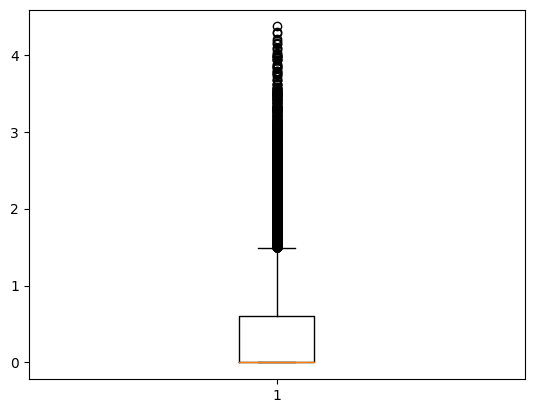

In [31]:
# np.log10(df_aux.text).plot.hist(bins=10)
plt.boxplot(np.log10(df_aux.text))
plt.show()

In [32]:
df_aux["retweeted_status.user.verified"].value_counts()

0    73986
1     3650
Name: retweeted_status.user.verified, dtype: int64

In [33]:
df_aux = df.groupby(by=["quoted_status.user.screen_name"]).agg({
        "quoted_status.user.followers_count": max,
        "quoted_status.user.friends_count": max,
        "quoted_status.user.listed_count": max,
        "quoted_status.user.favourites_count": max,
        "quoted_status.quote_count": max,
        "quoted_status.retweet_count": max,
        "quoted_status.reply_count": max,
        "quoted_status.retweet_count": max,
        "quoted_status.favorite_count": max,
        "quoted_status.user.verified": min,
        "text": 'count',
}).sort_values(by="quoted_status.user.followers_count", ascending=False)

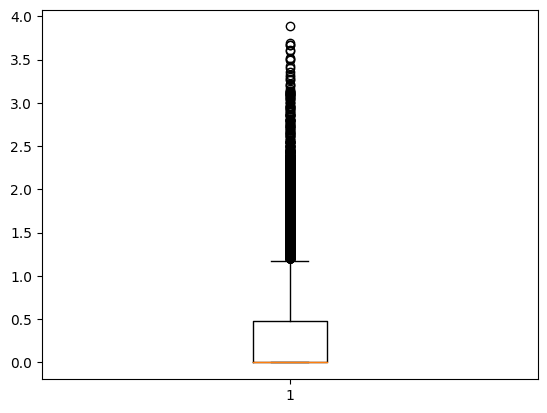

In [34]:
# np.log10(df_aux.text).plot.hist(bins=10)
plt.boxplot(np.log10(df_aux.text))
plt.show()

In [35]:
df_aux.shape

(29638, 10)

In [36]:
df_aux["quoted_status.user.verified"].value_counts()

0    26791
1     2847
Name: quoted_status.user.verified, dtype: int64

In [37]:
df_aux = df.groupby(by=["retweeted_status.quoted_status.user.screen_name"]).agg({
        "retweeted_status.quoted_status.user.followers_count": max,
        "retweeted_status.quoted_status.user.friends_count": max,
        "retweeted_status.quoted_status.user.listed_count": max,
        "retweeted_status.quoted_status.user.favourites_count": max,
        "retweeted_status.quoted_status.quote_count": max,
        "retweeted_status.quoted_status.retweet_count": max,
        "retweeted_status.quoted_status.reply_count": max,
        "retweeted_status.quoted_status.retweet_count": max,
        "retweeted_status.quoted_status.favorite_count": max,
        "retweeted_status.quoted_status.user.verified": min,
        "text": 'count',
}).sort_values(by="retweeted_status.quoted_status.user.followers_count", ascending=False)

In [38]:
df_aux.shape

(11328, 10)

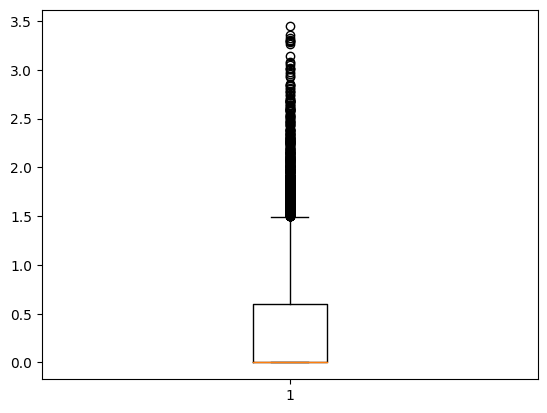

In [39]:
# np.log10(df_aux.text).plot.hist(bins=10)
plt.boxplot(np.log10(df_aux.text))
plt.show()

In [40]:
df_aux["retweeted_status.quoted_status.user.verified"].value_counts()

1    11328
Name: retweeted_status.quoted_status.user.verified, dtype: int64

## lang

In [41]:
df.lang.value_counts()

pt     1797506
es       73428
en       32713
qme      15956
zxx      10064
qht       7920
und       5831
art       5823
it        3751
fr        3371
in        2793
qst       2450
tr        2164
tl        1077
qam       1042
lt         710
ca         605
ro         488
de         464
ht         456
eu         350
nl         276
ja         245
et         229
sv         196
pl         193
hu         164
th         132
ko         119
is         106
cs          99
fi          87
lv          80
sl          65
da          63
no          41
vi          40
hi          38
cy          37
sr          22
el          20
zh          19
ar          13
ur           4
ru           3
kn           2
iw           2
fa           2
bg           1
uk           1
Name: lang, dtype: int64

In [42]:
df.lang.value_counts().shape

(50,)

In [43]:
df[df.lang == "es"].head(10)

created_at               id_str  \
15  2022-07-20 23:08:59+00:00  1549894165739307010   
17  2022-07-20 23:08:59+00:00  1549894166775271429   
33  2022-07-20 23:09:01+00:00  1549894175092576259   
37  2022-07-20 23:09:02+00:00  1549894177026187264   
74  2022-07-20 23:09:05+00:00  1549894189319688198   
100 2022-07-20 23:09:08+00:00  1549894204167430145   
105 2022-07-20 23:09:09+00:00  1549894206868447232   
109 2022-07-20 23:09:09+00:00  1549894208357408768   
118 2022-07-20 23:09:10+00:00  1549894212644229122   
123 2022-07-20 23:09:10+00:00  1549894213654892545   

                                                  text  \
15   RT @MuySuFrida: El extremo del autoritarismo l...   
17   RT @LaChiquisYareli: Si lo que dijo Alejandro ...   
33   RT @eltemaguillev: Al señor @CiroGomezL lo lla...   
37   RT @ImpudorPolitico: No es el teacher López Dó...   
74   @senadorhumberto @LulaOficial @danilocabralpe ...   
100  RT @jgnaredo: Si te sientes triste o deprimido...   
105  RT @Paulguerra16: Ni Dóriga, ni Loret de Mola,...   
109  RT @Almomento4T: Nuevo audio de Alito el más m...   
118                               Estadista! Lula? 🤣🤣🤣   
123  RT @makdavicho1974: Después de ver lo de anoch...   

                      source truncated is_quote_status  quote_count  \
15   Twitter for Android\n\n     False           False          0.0   
17   Twitter for Android\n\n     False           False          0.0   
33   Twitter for Android\n\n     False           False          0.0   
37   Twitter for Android\n\n     False           False          0.0   
74    Twitter for iPhone\n\n     False           False          0.0   
100      Twitter Web App\n\n     False           False          0.0   
105   Twitter for iPhone\n\n     False           False          0.0   
109   Twitter for iPhone\n\n     False           False          0.0   
118  Twitter for Android\n\n     False            True          0.0   
123      Twitter Web App\n\n     False           False          0.0   

     reply_count  retweet_count  favorite_count  ...  \
15           0.0            0.0             0.0  ...   
17           0.0            0.0             0.0  ...   
33           0.0            0.0             0.0  ...   
37           0.0            0.0             0.0  ...   
74           0.0            0.0             0.0  ...   
100          0.0            0.0             0.0  ...   
105          0.0            0.0             0.0  ...   
109          0.0            0.0             0.0  ...   
118          0.0            0.0             0.0  ...   
123          0.0            0.0             0.0  ...   

    extended_tweet.entities.urls_url  \
15                               NaN   
17                               NaN   
33                               NaN   
37                               NaN   
74                               NaN   
100                              NaN   
105                              NaN   
109                              NaN   
118                              NaN   
123                              NaN   

    retweeted_status.quoted_status.extended_tweet.entities.urls_url text_url  \
15                                                 NaN                    []   
17                                                 NaN                    []   
33                                                 NaN                    []   
37                                                 NaN                    []   
74                                                 NaN                    []   
100                                                NaN                    []   
105                                                NaN                    []   
109                                                NaN                    []   
118                                                NaN                    []   
123                                                NaN                    []   

       retweeted_status.text_url  \
15   ['https://t.co/HSNFf5vf

In [44]:
df[df.lang == "da"].head(7)

created_at               id_str  \
75932  2022-07-27 23:27:37+00:00  1552435568822616064   
84852  2022-07-27 23:42:03+00:00  1552439200896921600   
119831 2022-07-29 21:37:25+00:00  1553132611631042562   
262519 2022-08-13 14:30:01+00:00  1558460870941966337   
271037 2022-08-13 14:43:53+00:00  1558464362771320833   
283193 2022-08-14 18:32:42+00:00  1558884333389225985   
303764 2022-08-16 16:35:05+00:00  1559579509153824768   

                                                     text  \
75932   @SBotarelli @rjovaneli O Ciro é tipo um Dr Jek...   
84852                                          Kinder ovo   
119831                                   Premhead alert 🚨   
262519  RT @josehil44904368: #LulaEoPTporVidasEsonhos ...   
271037                                       🤭👇 Janine 😆🤣   
283193  Lazio slipper med skrækken og vinder en grim, ...   
303764                                         Killer🤣😂😂😂   

                         source truncated is_quote_status  quote_count  \
75932    Twitter for iPhone\n\n     False           False          0.0   
84852   Twitter for Android\n\n     False            True          0.0   
119831  Twitter for Android\n\n     False            True          0.0   
262519  Twitter for Android\n\n     False            True          0.0   
271037  Twitter for Android\n\n     False            True          0.0   
283193   Twitter for iPhone\n\n      True           False          0.0   
303764  Twitter for Android\n\n     False            True          0.0   

        reply_count  retweet_count  favorite_count  ...  \
75932           0.0            0.0             0.0  ...   
84852           0.0            0.0             0.0  ...   
119831          0.0            0.0             0.0  ...   
262519          0.0            0.0             0.0  ...   
271037          0.0            0.0             0.0  ...   
283193          0.0            0.0             0.0  ...   
303764          0.0            0.0             0.0  ...   

       extended_tweet.entities.urls_url  \
75932                               NaN   
84852                               NaN   
119831                              NaN   
262519                              NaN   
271037                              NaN   
283193                               []   
303764                              NaN   

       retweeted_status.quoted_status.extended_tweet.entities.urls_url  \
75932                                                 NaN                
84852                                                 NaN                
119831                                                NaN                
262519                                                 []                
271037                                                NaN                
283193                                                NaN                
303764                                                NaN                

                           text_url retweeted_status.text_url  \
75932                            []                       NaN   
84852                            []                       NaN   
119831                           []                       NaN   
262519                           []                        []   
271037                           []                       NaN   
283193  ['https://t.co/im5Dggo5Du']                       NaN   
303764                           []                       NaN   

       retweeted_status.extended_tweet.full_text_url  \
75932                                            NaN   
84852                                            NaN   
119831                                           NaN   
262519                                           NaN   
271037                                           NaN   
283193                                           NaN   
303764                                           NaN   

             quoted_status.text_url retweeted_status.quoted_status.text_url  \
75932                  

A priori no hay algo raro ne los idiomas. Coinciden con temas esperados. A priori.

## Tweet types

TODO:
* Create flags for the twitter types (or a multivalue column)

In [45]:
df.shape

(1971262, 126)

In [46]:
# df[~(df["retweeted_status.id_str"].isna())].shape
df[
    ~(df["retweeted_status.id_str"].isna())
    & (df["quoted_status.id_str"].isna())
    & (df["retweeted_status.quoted_status_id_str"].isna())
].shape

(1318141, 126)

In [47]:
# df[~(df["quoted_status.id_str"].isna())].shape
df[
    (df["retweeted_status.id_str"].isna())
    & ~(df["quoted_status.id_str"].isna())
    & (df["retweeted_status.quoted_status_id_str"].isna())
].shape

(167395, 126)

In [48]:
# df[~(df["retweeted_status.quoted_status_id_str"].isna())].shape
df[
    (df["retweeted_status.id_str"].isna())
    & (df["quoted_status.id_str"].isna())
    & ~(df["retweeted_status.quoted_status_id_str"].isna())
].shape

(0, 126)

In [49]:
df[
    (df["retweeted_status.id_str"].isna())
    & ~(df["quoted_status.id_str"].isna())
    & ~(df["retweeted_status.quoted_status_id_str"].isna())
].shape

(0, 126)

In [50]:
df[
    ~(df["retweeted_status.id_str"].isna())
    & ~(df["quoted_status.id_str"].isna())
    & (df["retweeted_status.quoted_status_id_str"].isna())
].shape

(0, 126)

In [51]:
df[
    ~(df["retweeted_status.id_str"].isna())
    & (df["quoted_status.id_str"].isna())
    & ~(df["retweeted_status.quoted_status_id_str"].isna())
].shape

(80, 126)

In [52]:
df[
    ~(df["retweeted_status.id_str"].isna())
    & ~(df["quoted_status.id_str"].isna())
    & ~(df["retweeted_status.quoted_status_id_str"].isna())
].shape

(123303, 126)

In [53]:
df[
    ~(df["retweeted_status.id_str"].isna())
    & ~(df["retweeted_status.quoted_status_id_str"].isna())
].shape

(123383, 126)

In [54]:
df[
    (df["retweeted_status.id_str"].isna())
    & (df["quoted_status.id_str"].isna())
    & (df["retweeted_status.quoted_status_id_str"].isna())
].shape

(362343, 126)

In [55]:
conditions = [
    # Tweet
    (df["retweeted_status.id_str"].isna())
    & (df["quoted_status.id_str"].isna())
    & (df["retweeted_status.quoted_status_id_str"].isna()),
    # Quote+Retweet
    ~(df["retweeted_status.id_str"].isna())
    & ~(df["retweeted_status.quoted_status_id_str"].isna()),
    # Retweet
    ~(df["retweeted_status.id_str"].isna())
    & (df["quoted_status.id_str"].isna())
    & (df["retweeted_status.quoted_status_id_str"].isna()),
    # Quote
    (df["retweeted_status.id_str"].isna())
    & ~(df["quoted_status.id_str"].isna())
    & (df["retweeted_status.quoted_status_id_str"].isna()),
]

choices = ["Tweet", "Quote+Retweet", "Retweet", "Quote"]

df["tw_type"] = np.select(conditions, choices, default="Other")

In [56]:
# !pip install squarify # (algorithm for treemap)
import squarify

In [57]:
# ! pip install mycolorpy
from mycolorpy import colorlist as mcp


In [58]:
def get_labels_tw_type():
    for index, value in df["tw_type"].value_counts().iteritems():
        print(f"index: {index}, value: {value}")
        yield f"{index} \n ({value})"

index: Retweet, value: 1318141
index: Tweet, value: 362343
index: Quote, value: 167395
index: Quote+Retweet, value: 123383


<ipython-input-58-08ebd99373f6>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in df["tw_type"].value_counts().iteritems():


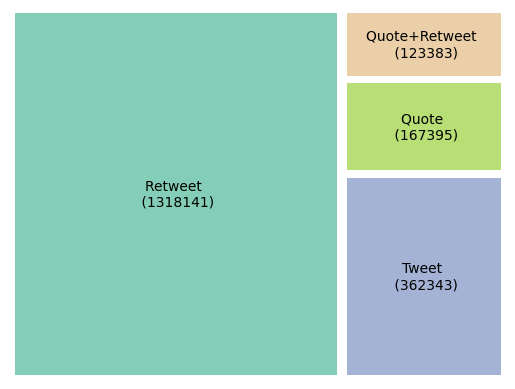

In [59]:
squarify.plot(
    sizes=df["tw_type"].value_counts(),
    label=get_labels_tw_type(),
    alpha=0.8,
    color=mcp.gen_color(cmap="Set2",n=5),
    pad=2
)
plt.axis("off")
plt.show()

## hashtags

todo:
* Todos los hashtags preproc de la misma manera (Moverlo al anterior)
* Nube de palabras
* 

In [60]:
df["hashtags"].to_list()[3]

'[]'

In [61]:
import ast

ast.literal_eval(df["hashtags"].to_list()[3])

[]

In [62]:
aux = (
    df[~(df["hashtags"].isna())]["hashtags"]
    .str.lower()
    .apply(ast.literal_eval)
    .to_list()
)

In [63]:
output = []
for i in aux:
    if len(i) > 1:
        output = output + i

In [64]:
output[0:10]

['timelulaemcampo',
 'timelula',
 'martesdeljaguar',
 'alitopack',
 'alitocachondo',
 'alitomoreno',
 'jairbolsonaro',
 'forabolsonaro',
 'ditaduranuncamais',
 'somos70porcento']

In [65]:
pd.DataFrame(output, columns=["hashtag"]).hashtag.value_counts()

1                          2819
lula                       2726
bolsonaroreeleitoem2022    2707
bolsonaro                  2389
lulano1ºturno              1922
                           ... 
danilobalas22007              1
paranapesquisa                1
13omdia                       1
ucrânia                       1
supremoeopovo                 1
Name: hashtag, Length: 8774, dtype: int64

## Preproc de texto

In [66]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [67]:
punctuation_list = string.punctuation

In [68]:
print(punctuation_list)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [69]:
def remove_punctuation(text):
    no_punct = [words for words in text if words not in punctuation_list]
    words_wo_punct = "".join(no_punct)
    return words_wo_punct

In [70]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)

In [71]:
def tokenize(text):
    split = re.split("\W+", text)
    return split

In [72]:
!pip install nltk

--- Logging error ---
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/usr/local/lib/python3.8/dist-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/segment.py", line 249, in split_lines
    for segment in segments:
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/console.py", line 1283, in render
    renderable = rich_cast(renderable)
  File "/usr/local/lib/python3.8/dist-packages/pip/_vendor/rich/protocol.py", line 36

In [73]:
import nltk

In [74]:
nltk.download('all-nltk')

[nltk_data] Downloading collection 'all-nltk'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    | 

True

In [75]:
stopword = nltk.corpus.stopwords.words("portuguese")
print(stopword[:11])

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às']


In [76]:
def remove_stopwords(text):
    text = [word for word in text if (word not in stopword) & (word != "")]
    return text

In [80]:
df["text"]

0          @cirogomes Esse é você?\n\nAs ideias mudaram? ...
1          RT @sartoprefeito12: Oficializamos hoje a cand...
2          #TimeLulaEmCampo\naLÔ, Pelo dia do amigo eu qu...
3          RT @Frmarchetaria: @desmentindobozo @paoladcs ...
4          RT @ThiagoResiste: Criminoso preso com MALAS D...
                                 ...                        
1971297    RT @juliovschneider: Aquilo que a mídia nacion...
1971298    RT @MonicaDouaudM: Muito bem dito #CensuraNao ...
1971299    RT @gasiber: ¿Habéis visto cómo está Brasil?? ...
1971300    RT @choquei: 🚨AGORA: Há 1 semana, Luiz Inácio ...
1971301                                             sortudos
Name: text, Length: 1971262, dtype: object

In [81]:
df["text"] = df["text"].astype(str)

In [82]:
df["text"] = df["text"].apply(lambda x: remove_punctuation(x))
df.text.head()

0    cirogomes Esse é você\n\nAs ideias mudaram Ou ...
1    RT sartoprefeito12 Oficializamos hoje a candid...
2    TimeLulaEmCampo\naLÔ Pelo dia do amigo eu quer...
3    RT Frmarchetaria desmentindobozo paoladcs cris...
4    RT ThiagoResiste Criminoso preso com MALAS DE ...
Name: text, dtype: object

In [83]:
df["text"] = df["text"].apply(lambda x: remove_emoji(x))
df["text"].head()

0    cirogomes Esse é você\n\nAs ideias mudaram Ou ...
1    RT sartoprefeito12 Oficializamos hoje a candid...
2    TimeLulaEmCampo\naLÔ Pelo dia do amigo eu quer...
3    RT Frmarchetaria desmentindobozo paoladcs cris...
4    RT ThiagoResiste Criminoso preso com MALAS DE ...
Name: text, dtype: object

In [ ]:
df["text"] = df["text"].apply(lambda x: tokenize(x.lower()))
df["text"].head()

In [ ]:
df["text"] = df["text"].apply(lambda x: remove_stopwords(x))
df["text"].head()

In [ ]:
df["text"][0]

In [ ]:
from collections import Counter

cnt = Counter()
for text in df["text"].values:
    for word in text:
        cnt[word] += 1

cnt.most_common(10)

In [ ]:
# TODO: Stemming?

In [77]:
df["hashtags"] = df["hashtags"].astype(str)
df["hashtags"] = df["hashtags"].apply(lambda x: remove_punctuation(x))
df["hashtags"] = df["hashtags"].apply(lambda x: remove_emoji(x))
df["hashtags"] = df["hashtags"].apply(lambda x: tokenize(x.lower()))
df["hashtags"] = df["hashtags"].apply(lambda x: remove_stopwords(x))

In [78]:
df["hashtags"].head()

0                             []
1                             []
2    [timelulaemcampo, timelula]
3                             []
4                             []
Name: hashtags, dtype: object

In [90]:
from collections import Counter

cnt = Counter()
for hashtags in df["hashtags"].values:
    for word in hashtags:
        cnt[word] += 1

cnt.most_common(25)

[('bolsonaroreeleitoem2022', 8838),
 ('eleicoes2022', 5180),
 ('lula', 3898),
 ('lulano1ºturno', 3786),
 ('eleições2022', 3595),
 ('bolsonaro', 3522),
 ('bolsonaronoprimeiroturno', 3455),
 ('equipelula', 3155),
 ('1', 3027),
 ('brasildaesperança', 2832),
 ('lulapresidente1', 2398),
 ('lulapresidente13', 2189),
 ('bolsonaro22', 2094),
 ('brazilwasstolen', 2027),
 ('brasildaesperanca', 1890),
 ('brasil', 1766),
 ('lulanoprimeiroturno', 1646),
 ('bolsonaronoprimeiroturno22', 1353),
 ('forabolsonaro', 1351),
 ('cironaglobonews', 1329),
 ('twibbon', 1264),
 ('debatenaglobo', 1243),
 ('lulanaband', 1234),
 ('debatenaband', 1233),
 ('lulanojn', 1220)]

In [ ]:
df["retweeted_status.text"] = df["retweeted_status.text"].astype(str)
df["retweeted_status.text"] = df["retweeted_status.text"].apply(
    lambda x: remove_punctuation(x)
)
df["retweeted_status.text"] = df["retweeted_status.text"].apply(
    lambda x: remove_emoji(x)
)
df["retweeted_status.text"] = df["retweeted_status.text"].apply(
    lambda x: tokenize(x.lower())
)
df["retweeted_status.text"] = df["retweeted_status.text"].apply(
    lambda x: remove_stopwords(x)
)

In [ ]:
df["retweeted_status.text"].head()

In [ ]:
df["retweeted_status.text"] = df["retweeted_status.text"].astype(str)

In [ ]:
from collections import Counter

cnt = Counter()
for url in df["retweeted_status.text"].values:
    for word in hashtags:
        cnt[word] += 1
    # cnt[url] += 1

cnt.most_common(10)

## URLS

In [80]:
aux = (
    df[~(df["retweeted_status.entities.urls_url"].isna())][
        "retweeted_status.entities.urls_url"
    ]
    .str.lower()
    .apply(ast.literal_eval)
    .to_list()
)

In [81]:
aux[0:20]

[["https://t.co/5rxexgv6bv',",
  "https://twitter.com/i/web/status/1549891509431984133',"],
 ["https://t.co/qmz2vx5ltk',",
  "https://twitter.com/i/web/status/1549893699718549518',"],
 ["https://t.co/3pqji3eqpq',",
  "https://twitter.com/i/web/status/1549824256149790722',"],
 [],
 [],
 [],
 ["https://t.co/ih53c3ot3o',",
  "https://twitter.com/i/web/status/1549506089112276997',"],
 ["https://t.co/f6nqknwmgz',",
  "https://twitter.com/i/web/status/1549889035283357696',"],
 [],
 ["https://t.co/hsnff5vfvx',",
  "https://twitter.com/i/web/status/1549866420833603584',"],
 [],
 ["https://t.co/vy7nlddbpi',",
  "https://twitter.com/i/web/status/1549589128081129472',"],
 [],
 [],
 ["https://t.co/qmz2vx5ltk',",
  "https://twitter.com/i/web/status/1549893699718549518',"],
 ["https://t.co/xv9ekg6wjx',",
  "https://twitter.com/i/web/status/1549873476814749701',"],
 ["https://t.co/9r0ab6rdza',",
  "https://valor.globo.com/politica/noticia/2022/07/20/lula-diz-para-o-povo-dar-uma-banana-a-bolsonaro.ght

In [82]:
from collections import Counter

cnt = Counter()
for urls in aux:
    # for word in df["retweeted_status.entities.urls_url"].values:
    for word in urls:
        cnt[word] += 1
    # cnt[word] += 1

cnt.most_common(30)

[("https://t.co/eqcaxf8wyl',", 1910),
 ("https://twitter.com/i/web/status/1585280250124050439',", 1910),
 ("https://t.co/r7tpgbxrzp',", 1809),
 ("https://twitter.com/i/web/status/1585279881193181185',", 1809),
 ("https://t.co/0g0ol6pfud',", 1203),
 ("https://twitter.com/i/web/status/1576543815649091585',", 1203),
 ("https://t.co/qi2lp82g6j',", 1121),
 ("https://twitter.com/i/web/status/1585012329061978113',", 1121),
 ("https://t.co/orbgxjouvr',", 1072),
 ("https://twitter.com/i/web/status/1585257610621566976',", 1072),
 ("https://t.co/knryzw4zcw',", 1052),
 ("https://twitter.com/i/web/status/1582879371466985472',", 1052),
 ("https://t.co/xro4j3sh9n',", 1029),
 ("https://twitter.com/i/web/status/1576558418969911296',", 1029),
 ("https://t.co/neox4ftirw',", 958),
 ("https://twitter.com/i/web/status/1585258417467162624',", 958),
 ("https://t.co/hbpv5v4z46',", 942),
 ("https://twitter.com/i/web/status/1585281249895120903',", 942),
 ("https://t.co/5j52pxuays',", 894),
 ("https://twitter.com

# User id

Creadores de tweets (TW, RT, QT)

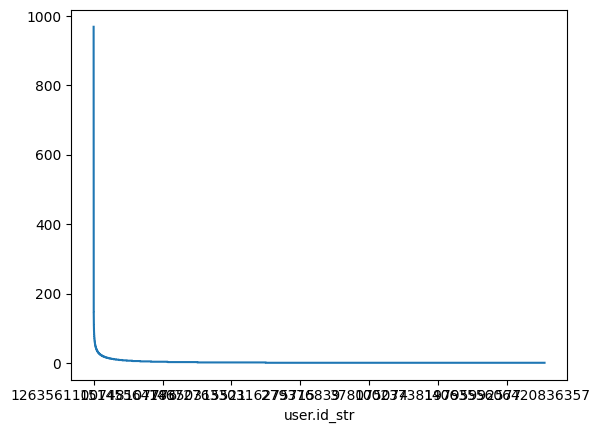

In [83]:
df.groupby(by=["user.id_str"]).text.count().sort_values(ascending=False).plot()
plt.show()

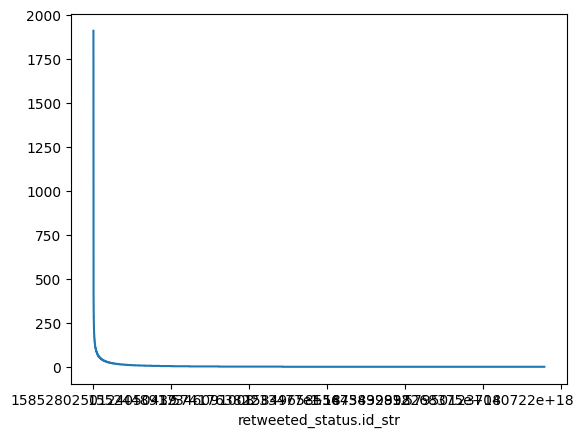

In [84]:
df.groupby(by=["retweeted_status.id_str"]).text.count().sort_values(
    ascending=False
).plot()
plt.show()

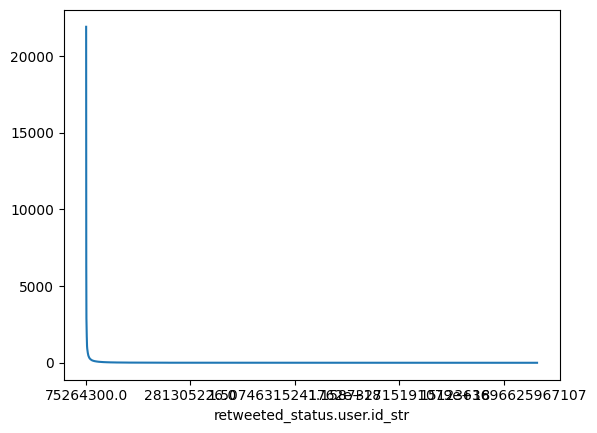

In [85]:
df.groupby(by=["retweeted_status.user.id_str"]).text.count().sort_values(
    ascending=False
).plot()
plt.show()

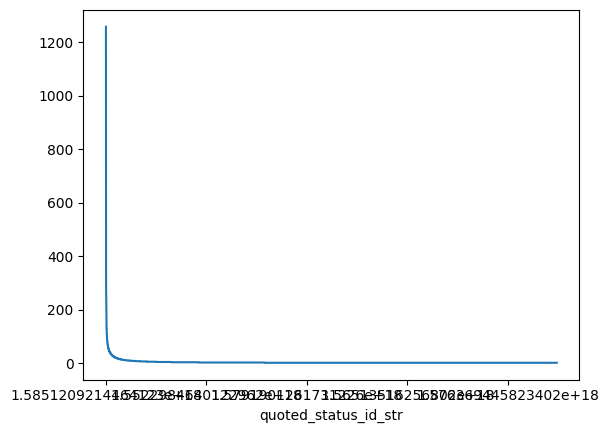

In [86]:
df.groupby(by=["quoted_status_id_str"]).text.count().sort_values(ascending=False).plot()
plt.show()

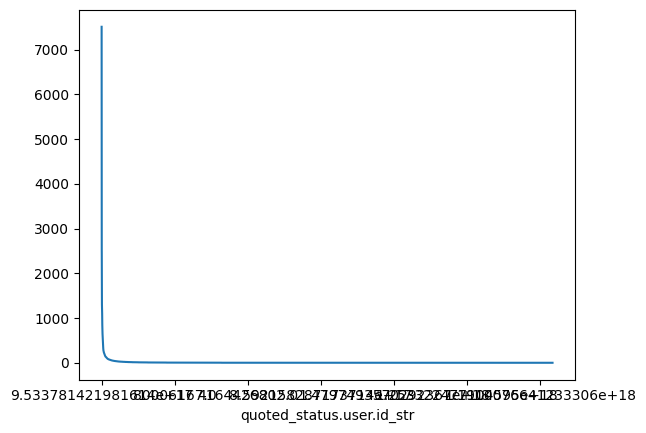

In [87]:
df.groupby(by=["quoted_status.user.id_str"]).text.count().sort_values(
    ascending=False
).plot()
plt.show()

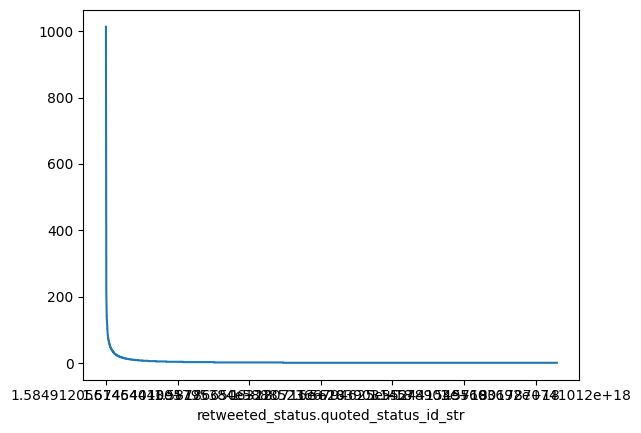

In [88]:
df.groupby(by=["retweeted_status.quoted_status_id_str"]).text.count().sort_values(
    ascending=False
).plot()
plt.show()

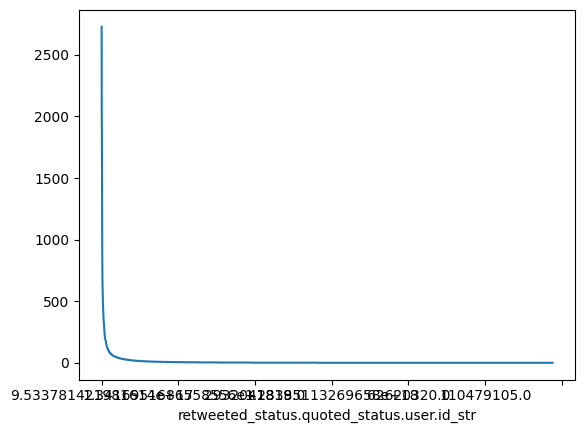

In [89]:
df.groupby(by=["retweeted_status.quoted_status.user.id_str"]).text.count().sort_values(
    ascending=False
).plot()
plt.show()

## Next steps

cosas que no estan ni empezadas, o que ya se que toca hacer (En alguna otra parte/notebook)

TODO:
* Sources sin caracteres de salto de linea
* Sacar url place
* Hacer un preproc de hashtags y url, para todos
* To lower todas las que son string
* Links entre cuentas (tw <- rt, tw <- qt, ...)
    * Nodos y referenciales, cuales? 
    * Pesos? Asociados a las interacciones?
    * Mencion especial si es verificado?
* Toca filtrar algo? Solo retweet por ejemplo?
* Cuantos tweets unicos RT tengo, cuanto quotes, 
* Flags de: autor, comentador, amplificador, ...
* Clasificar en medios, individuos y políticos?
* Nube de palabras de todo
* Kmeans (Con que columnas?)
